<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Признаки-умножают-на-обратимую-матрицу.-Изменится-ли-качество-линейной-регрессии?-(Её-можно-обучить-заново.)" data-toc-modified-id="Признаки-умножают-на-обратимую-матрицу.-Изменится-ли-качество-линейной-регрессии?-(Её-можно-обучить-заново.)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span><ul class="toc-item"><li><span><a href="#Обоснование" data-toc-modified-id="Обоснование-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span><strong>Обоснование</strong></a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

# Описание данных

 - Набор данных находится в файле /datasets/insurance.csv. Скачать датасет.
 - Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
 - Целевой признак: количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

**Импортируем библиотеки**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**Загрузим датасет**

In [2]:
data = pd.read_csv('/datasets/insurance.csv')

**Псмотрим на его содежимое**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [5]:
data.tail()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0
4999,1,28.0,40600.0,1,0


 - **Пропуски в данных отсутствуют**
 
 
 - **Заменю тип данных в колоках "Возраст" и "Зарплата" на целочисленный. Хотя в контексте текущей задачи это действие не имеет значения.**.

In [6]:
data['Возраст'] = data['Возраст'].astype('int64')

In [7]:
data['Зарплата'] = data['Зарплата'].astype('int64')

In [8]:
data.dtypes

Пол                  int64
Возраст              int64
Зарплата             int64
Члены семьи          int64
Страховые выплаты    int64
dtype: object

In [9]:
print('Количество явных дубликатов -', data.duplicated().sum())

Количество явных дубликатов - 153


**В датасете есть явные дубликаты. Считаю, что конечную цель наличие дубликатов не повлияет, поэтому удаление не имеет смысла.**

**Псмотрим на распределение данных в колонках.**

In [10]:
for column in data.columns:
    print(column)

Пол
Возраст
Зарплата
Члены семьи
Страховые выплаты


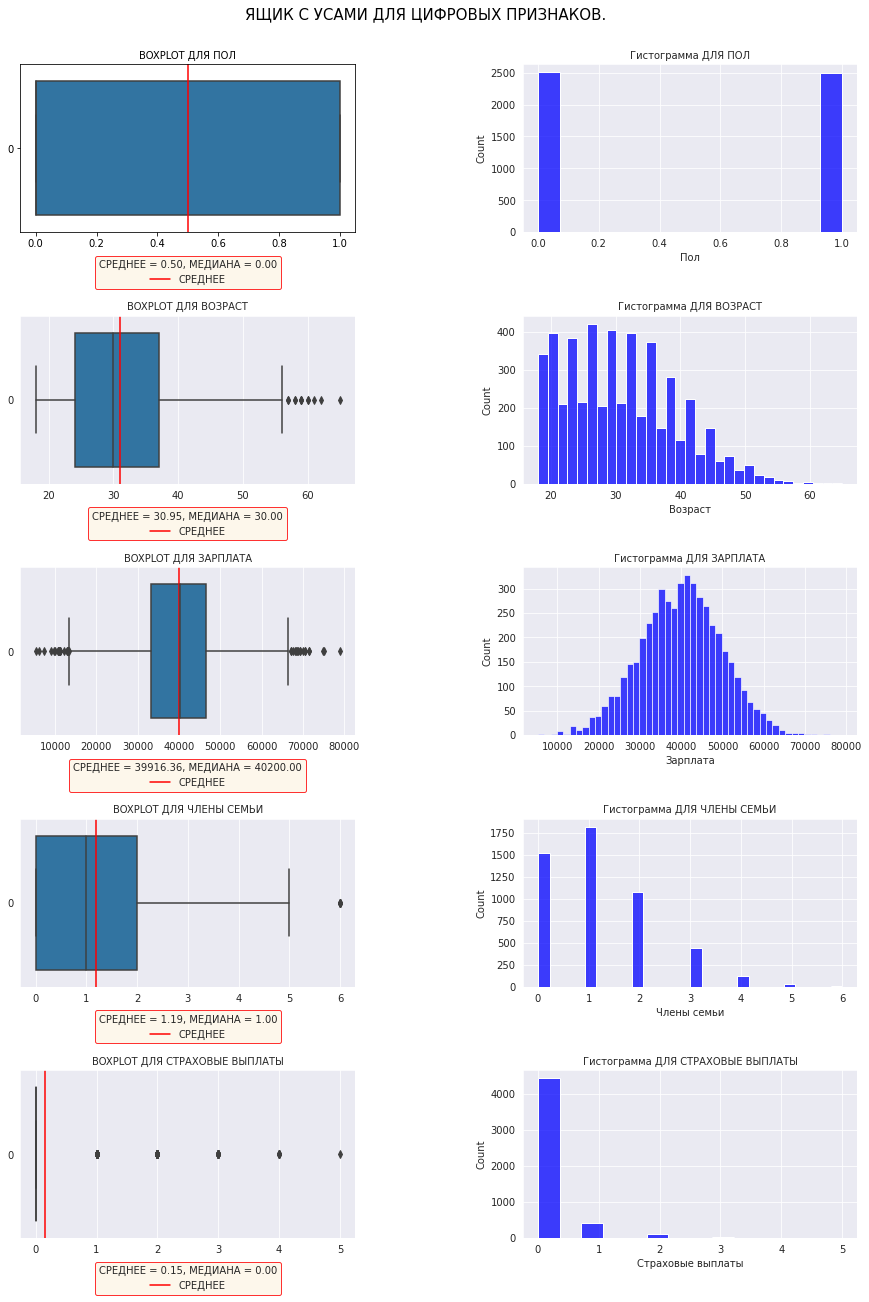

In [11]:
position = 0
num_region = None
plt.figure(figsize=[15, 20])
plt.subplots_adjust(top=0.94, wspace=0.5, hspace=0.5)
plt.suptitle('ЯЩИК С УСАМИ ДЛЯ ЦИФРОВЫХ ПРИЗНАКОВ.', fontsize=15)

for column_name in data.columns:
    position += 1
    plt.subplot(5, 2, position)
    sns.set_style('darkgrid')
    plt.title(f'BOXPLOT ДЛЯ {column_name.upper()}', fontsize=10)
    sns.set_style('darkgrid')
    sns.boxplot(data=data[column_name], orient='h')
    plt.axvline(np.mean(data[column_name]), 
                color='r', 
                linestyle='-',
                label='СРЕДНЕЕ')
    plt.legend(title=f'СРЕДНЕЕ = {np.mean(data[column_name]):.2f}, МЕДИАНА = {np.median(data[column_name]):.2f}', 
               loc='center', 
               edgecolor = 'r',
               facecolor = 'oldlace',
               bbox_to_anchor=(0.5, -0.24))
    position += 1
    plt.subplot(5, 2, position)
    sns.set_style('darkgrid')
    plt.title(f'Гистограмма ДЛЯ {column_name.upper()}', fontsize=10)
    sns.histplot(data[column_name], color='b', label='Сырье', kde=False)
plt.show();

**В данных есть выбросы. Значимые нарушения не выявлены.**

### Вывод

**В данных отсутстсвуют критические нарушения.**

**Так же присутствуют выбросы, явные дубликаты, и не совсем корректный формат данных для некоторых колонок.**

**Учитывая конечную цель проекта, манипуляции с данными не целесообразны. Данные оставляем в исходном виде.**

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

### Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

**Ответ:** **Не изменится**

**Обоснование:**

**Запишем новое представление матрицы признаков с учетом домнажения на обратную матрицу:**

**$$Z = XP$$**

**Тогда формулы c учетом новых введений будут иметь следующий вид:**

**Предсказания: $A = ZW$**

**Формула обучения: $W = (Z^T Z)^{-1} Z^T y$,**

**где W - вектор весов**


**Подставим значение Z в формулу обучения и преобразуем ее:**


**$$W = (Z^T Z)^{-1} Z^T y$$**

**$$W = ((XP)^T(XP))^{-1}(XP)^T y$$**

**$$W = (X^T P^T X P)^{-1} X^T P^T y$$**

**$$W = (X^T X)^{-1}  (P^T)^{-1}P^{-1} X^T P^T y$$**

**<u>По свойству обратной матрицы: при умножение матрицы на обратную ей получается единичная матрица (E)</u>**


**Получается, что:** 

**$$(P^T)^{-1}  P^T = E$$**
 
**Вектор весов линейной регрессии имеет следующий вид:**
 
**$$W = (X^T X)^{-1}  E P^{-1} X^T y$$**
 
**<u>Так как при умножение любой матрицы на единичную матрицу получается таже самая матрица, имеем:</u>**


**$$W = (X^T X)^{-1} P^{-1} X^T y$$**

**Полученную выше формулу можно представить ввиде $W=P^{-1}w$ так как $w = (X^T X)^{-1} X^T y$ по условию**

**Подставим полученное значение вектора весов линейной регрессии в формулу предсказаний:**

$$A = Z (P^{-1}w)$$

$$A = XP (P^{-1}w)$$

**<u>По свойству обратной матрицы и еденичной матрицы сразу сократим $P$ и $P^{-1}$</u>**

$$A = X w$$

### Вывод

**Исходная формула вектора предсказаний равна  формуле вектора предсказаний в случае, для которого матрицу признаков умножили на обратимую матрицу. Качество линейной регрессии не изменится.**

## Алгоритм преобразования

**Алгоритм:**

**В соответствие с проведенными выше вычислениями умножим матрицу признаков на обратимую матрицу той же размерности,в которой все величины сгенерированы случайно.**

### **Обоснование**


In [12]:
features = data.drop(['Страховые выплаты'], axis=1)
target = data['Страховые выплаты']

**Создадим рандомную матрицу той же размерности.**

In [13]:
random_matrix = np.random.randn(4, 4)

**Проверим матрицу на обратимость.**

In [14]:
try:
    inv_matrix = np.linalg.inv(random_matrix)
    print('\nОбратная матрица к заданной существует')
except:
    print('\nОбратная матрица к заданной не существует')


Обратная матрица к заданной существует


**Рассчитаем результаты для исходных параметров.**


$$
a = Xw
$$


$$
w = (X^T X)^{-1} X^T y
$$

In [15]:
w = np.linalg.inv(features.T.dot(features)).dot(features.T).dot(target)
a = features @ w

**Рассчитаем результаты для новых параметров.**

In [16]:
features_upgraded = features @ random_matrix

In [17]:
w2 = np.linalg.inv(features_upgraded.T.dot(features_upgraded)).dot(features_upgraded.T).dot(target)
a2 = features_upgraded @ w2

**Посмотрим, есть ли разница между результатами.**

In [18]:
difference = a - a2

In [19]:
difference.sum()

-6.310664351888429e-06

**Разница между исходными предсказаниями и предсказаниями с использованием обратимой матрицы не значительно минимально.**

### Вывод

**Используемый алгоритм не создает различий в предсказаниях при использовании исходных параметров и модернизированных. Значит, качество предсказаний модели не ухудшится.**

## Проверка алгоритма

**Создадим класс модели Линейной Регрессии.**

In [20]:
class ConstantRegression:
    def model_fit(self, features, target):
        self.model = LinearRegression()
        self.model.fit(features, target)
        
    def predict_result(self, features):
        result = self.model.predict(features)
        return result
        
    def get_r2_score(self, target, predict):
        r2 = r2_score(target, predict)
        return r2  

**Вычислим результат метрики для исходных признаков.**

In [21]:
model1 = ConstantRegression()
model1.model_fit(features, target)
predict_for_true_features = model1.predict_result(features)
r2_for_true_features = model1.get_r2_score(target, predict_for_true_features)

**Вычислим результат метрики для  признаков, умноженных на обратимую матрицу.**

In [22]:
model2 = ConstantRegression()
model2.model_fit(features_upgraded, target)
predict_for_upgraded_features = model2.predict_result(features_upgraded)
r2_for_upgraded_features = model2.get_r2_score(target, predict_for_upgraded_features)

**Оценим результаты.**

In [23]:
print('\nЗначение R2 при использовании исходных признаков -', r2_for_true_features)
print('\nЗначение R2 при использовании признаков, умноженых на обратимую матрицу -', r2_for_upgraded_features)


Значение R2 при использовании исходных признаков - 0.42494550308169177

Значение R2 при использовании признаков, умноженых на обратимую матрицу - 0.42494550308168944


**Разница не значительно минимальна, при умножении признаков на обратимую матрицу качество модели не изменилось.**

# Вывод

**При умножение матрицы признаков на обратимую матрицу качество Линейной Регрессии не изменяется.**